# Introduction to the Breast Cancer Wisconsin Diagnostic Dataset and Data Preprocessing

## Introduction
The Breast Cancer Wisconsin Diagnostic dataset is widely used for predictive modeling and machine learning research. It consists of features derived from digitized images of fine needle aspirates (FNAs) of breast masses, aiding in the classification of tumors as either malignant or benign. Understanding and preparing this dataset is crucial for developing effective predictive models.

## Dataset Overview
The dataset contains **30 numerical features** computed from cell nuclei, including:
- Mean radius
- Mean texture
- Mean perimeter
- Mean area
- Mean smoothness

Additionally, the dataset has a target variable:
- `Diagnosis` (M = Malignant, B = Benign)

These features provide insights into the characteristics of cell nuclei, helping to distinguish between malignant and benign cases.

## Data Preprocessing Steps
Before building a predictive model, it is essential to preprocess the data properly. The preprocessing steps include:

1. **Loading the Dataset**
   - Import the dataset and examine its structure.
   - Identify feature distributions and summary statistics.

2. **Handling Missing Values**
   - Check for missing data and decide on an appropriate handling strategy (e.g., imputation or removal).

3. **Feature Scaling**
   - Normalize or standardize numerical features to ensure uniformity and prevent bias in model training.

4. **Encoding Categorical Variables**
   - Convert categorical variables (e.g., `Diagnosis`) into numerical values (e.g., 0 for benign and 1 for malignant).

5. **Feature Selection and Engineering**
   - Identify and select the most relevant features for modeling.
   - Perform feature extraction if necessary to improve model performance.

6. **Splitting the Data**
   - Divide the dataset into training and testing sets to assess model performance.

7. **Exploratory Data Analysis (EDA)**
   - Visualize relationships between features and the target variable.
   - Use correlation matrices and histograms to gain insights into the data distribution.

### 1. Loading the Dataset

In [1]:
from sklearn import linear_model
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (569, 30)
y.shape: (569, 1)


In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [4]:
map_target = {"M": 1, "B": 0}

# Convert Target value into binary
y['Diagnosis'] = y['Diagnosis'].map(map_target)
print(y.value_counts())

Diagnosis
0            357
1            212
Name: count, dtype: int64


/var/folders/py/fq19f9m93jdgvmyxf67rxz3h0000gn/T/ipykernel_8207/557396200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map(map_target)


### 2. Handle Missing values

In [5]:
print("Missing values in X:\n",X.isnull().count())
print("\nMissing values in y:\n",y.isnull().count())

Missing values in X:
 radius1               569
texture1              569
perimeter1            569
area1                 569
smoothness1           569
compactness1          569
concavity1            569
concave_points1       569
symmetry1             569
fractal_dimension1    569
radius2               569
texture2              569
perimeter2            569
area2                 569
smoothness2           569
compactness2          569
concavity2            569
concave_points2       569
symmetry2             569
fractal_dimension2    569
radius3               569
texture3              569
perimeter3            569
area3                 569
smoothness3           569
compactness3          569
concavity3            569
concave_points3       569
symmetry3             569
fractal_dimension3    569
dtype: int64

Missing values in y:
 Diagnosis    569
dtype: int64


There are no missing values in feature and target dataset.

### 3. Feature Scaling

In [6]:
X.describe()

radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         0.020310    0.161900   
50%        0.092630    0.061540         0.033500    0.179200   
75%        0.130400    0.130700         0.074000    0.195700   
max        0.345400    0.426800         0.201200    0.304000   

       fractal_dimension1  ...     radius3    texture3  perimeter3  \
count          569.000000  ...  569.000000  569.000000  569.000000   
mean             0.062798  ...   16.269190   25.677223  107.261213   
std              0.007060  ...    4.833242    6.146258   33.602542   
min              0.049960  ...    7.930000   12.020000   50.410000   
25%              0.057700  ...   13.010000   21.080000   84.110000   
50%              0.061540  ...   14.970000   25.410000   97.660000   
75%              0.066120  ...   18.790000   29.720000  125.400000   
max              0.097440  ...   36.040000   49.540000  251.200000   

             area3  smoothness3  compactness3  concavity3  concave_points3  \
count   569.000000   569.000000    569.000000  569.000000       569.000000   
mean    880.583128     0.132369      0.254265    0.272188         0.114606   
std     569.356993     0.022832      0.157336    0.208624         0.065732   
min     185.200000     0.071170      0.027290    0.000000         0.000000   
25%     515.300000     0.116600      0.147200    0.114500         0.064930   
50%     686.500000     0.131300      0.211900    0.226700         0.099930   
75%    1084.000000     0.146000      0.339100    0.382900         0.161400   
max    4254.000000     0.222600      1.058000    1.252000         0.291000   

        symmetry3  fractal_dimension3  
count  569.000000          569.000000  
mean     0.290076            0.083946  
std      0.061867            0.018061  
min      0.156500            0.055040  
25%      0.250400            0.071460  
50%      0.282200            0.080040  
75%      0.317900            0.092080  
max      0.663800            0.207500  

[8 rows x 30 columns]

In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Initialize Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.describe()

radius1      texture1    perimeter1         area1   smoothness1  \
count  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17 -1.248757e-16 -2.185325e-16 -8.366672e-16   
std    1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00 -1.984504e+00 -1.454443e+00 -3.112085e+00   
25%   -6.893853e-01 -7.259631e-01 -6.919555e-01 -6.671955e-01 -7.109628e-01   
50%   -2.150816e-01 -1.046362e-01 -2.359800e-01 -2.951869e-01 -3.489108e-02   
75%    4.693926e-01  5.841756e-01  4.996769e-01  3.635073e-01  6.361990e-01   
max    3.971288e+00  4.651889e+00  3.976130e+00  5.250529e+00  4.770911e+00   

       compactness1    concavity1  concave_points1     symmetry1  \
count  5.690000e+02  5.690000e+02     5.690000e+02  5.690000e+02   
mean   1.873136e-16  4.995028e-17    -4.995028e-17  1.748260e-16   
std    1.000880e+00  1.000880e+00     1.000880e+00  1.000880e+00   
min   -1.610136e+00 -1.114873e+00    -1.261820e+00 -2.744117e+00   
25%   -7.470860e-01 -7.437479e-01    -7.379438e-01 -7.032397e-01   
50%   -2.219405e-01 -3.422399e-01    -3.977212e-01 -7.162650e-02   
75%    4.938569e-01  5.260619e-01     6.469351e-01  5.307792e-01   
max    4.568425e+00  4.243589e+00     3.927930e+00  4.484751e+00   

       fractal_dimension1  ...       radius3      texture3    perimeter3  \
count        5.690000e+02  ...  5.690000e+02  5.690000e+02  5.690000e+02   
mean         4.745277e-16  ... -8.241796e-16  1.248757e-17 -3.746271e-16   
std          1.000880e+00  ...  1.000880e+00  1.000880e+00  1.000880e+00   
min         -1.819865e+00  ... -1.726901e+00 -2.223994e+00 -1.693361e+00   
25%         -7.226392e-01  ... -6.749213e-01 -7.486293e-01 -6.895783e-01   
50%         -1.782793e-01  ... -2.690395e-01 -4.351564e-02 -2.859802e-01   
75%          4.709834e-01  ...  5.220158e-01  6.583411e-01  5.402790e-01   
max          4.910919e+00  ...  4.094189e+00  3.885905e+00  4.287337e+00   

            area3   smoothness3  compactness3    concavity3  concave_points3  \
count  569.000000  5.690000e+02  5.690000e+02  5.690000e+02     5.690000e+02   
mean     0.000000 -2.372638e-16 -3.371644e-16  7.492542e-17     2.247763e-16   
std      1.000880  1.000880e+00  1.000880e+00  1.000880e+00     1.000880e+00   
min     -1.222423 -2.682695e+00 -1.443878e+00 -1.305831e+00    -1.745063e+00   
25%     -0.642136 -6.912304e-01 -6.810833e-01 -7.565142e-01    -7.563999e-01   
50%     -0.341181 -4.684277e-02 -2.695009e-01 -2.182321e-01    -2.234689e-01   
75%      0.357589  5.975448e-01  5.396688e-01  5.311411e-01     7.125100e-01   
max      5.930172  3.955374e+00  5.112877e+00  4.700669e+00     2.685877e+00   

          symmetry3  fractal_dimension3  
count  5.690000e+02        5.690000e+02  
mean   2.622390e-16       -5.744282e-16  
std    1.000880e+00        1.000880e+00  
min   -2.160960e+00       -1.601839e+00  
25%   -6.418637e-01       -6.919118e-01  
50%   -1.274095e-01       -2.164441e-01  
75%    4.501382e-01        4.507624e-01  
max    6.046041e+00        6.846856e+00  

[8 rows x 30 columns]

In [8]:
breast_cancer_df = pd.concat([X_scaled_df, y], axis=1)
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

### Compute Feature Importance using Simple Regression
Use simple regression to separately compute feature importance for each input variable.

### **Feature Importance using Simple Regression**

Since the features are standardized, the **Pearson Correlation Coefficient (PCC)** is the same as the simple regression coefficient:


$$W = \frac{1}{N} X^T y$$

Where:
- $ W $ : The coefficient vector (feature importance).
- $ N $ : The number of samples.
- $ X^T $ : The transpose of the standardized feature matrix.
- $ y $ : The standardized target vector.

In [9]:
class SimpleRegression:
    def __init__(self):
        self.coef = None

    def fit(self, X_train, y_train):
        '''
        Calculate the coefficient of the simple regression model.

        :param X_train: Standardized feature matrix
        :param y_train: Standardized target vector
        :return: Array of coefficients
        '''
        self.X = np.asarray(X_train)
        self.y = np.asarray(y_train)
        N = self.X.shape[0]

        self.coef = np.dot(self.X.T, self.y) / N

    def get_coef(self):
        '''
        Return the coefficient of the simple regression model.

        :return: Array of coefficients
        '''
        return self.coef.flatten() if self.coef.ndim > 1 else self.coef

Consider using full dataset or only training dataset when computing feature importance using simple regression.

In [10]:
simple_regression = SimpleRegression() # Initialize Simple Regression
simple_regression.fit(X_scaled_df, y)  # Fit standardized data

feature_importance = simple_regression.get_coef() # Get coefficient of the feature importance

# Display feature importance using pandas
importance_df = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=True)

print(importance_df)

               Feature  Importance
14         smoothness2   -0.032402
9   fractal_dimension1   -0.006207
11            texture2   -0.004015
18           symmetry2   -0.003153
19  fractal_dimension2    0.037699
16          concavity2    0.122676
15        compactness2    0.141663
29  fractal_dimension3    0.156590
8            symmetry1    0.159794
4          smoothness1    0.173361
17     concave_points2    0.197285
1             texture1    0.200739
28           symmetry3    0.201275
24         smoothness3    0.203775
21            texture3    0.220909
13               area2    0.265068
12          perimeter2    0.268890
10             radius2    0.274205
25        compactness3    0.285743
5         compactness1    0.288420
26          concavity3    0.318917
6           concavity1    0.336685
3                area1    0.342788
0              radius1    0.352963
23               area3    0.354799
2           perimeter1    0.359059
20             radius3    0.375410
7      concave_point

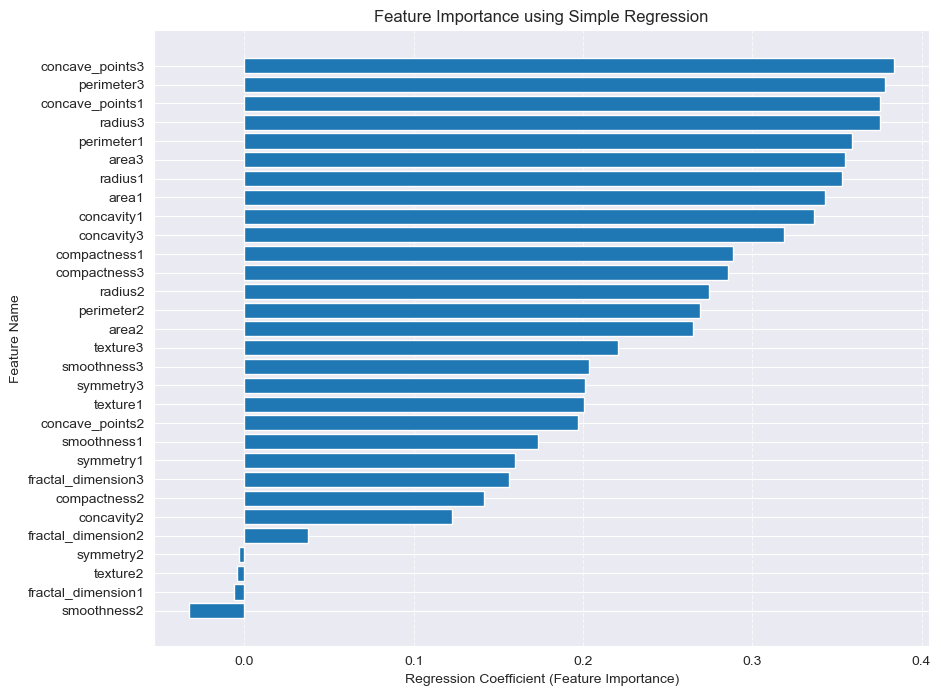

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Regression Coefficient (Feature Importance)')
plt.ylabel('Feature Name')
plt.title('Feature Importance using Simple Regression')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

The regression coefficients indicate how **strongly** correlated a feature is with the target. However, some **less important** features may still provide **useful complementary information** when combined with others.

#### Pairwise Scatter plots

Divide a feature into 4 levels:
-  top_features = `["concave_points3", "perimeter3", "concave_points1", "radius3", "perimeter1", "area3", "radius1", "area1", "concavity1", "concavity3"]`
- sec_top_features = `["compactness1", "compactness3", "radius2", "perimeter2", "area2", "texture3", "smoothness3"]`
- sec_bottom_features = `["symmetry3", "texture1", "concave_points2", "compactness2", "symmetry1", "smoothness1", "concavity2"]`
- bottom_features = `["fractal_dimension2", "symmetry2", "texture2","fractal_dimension1", "smoothness2"]`

To see the trends between pairwise features using scatter plots.

What to look for?
<ul>
    <li>Do top features clearyly separate malignant and benign cases?</li>
    <li>Are some features redundant or showing similar trends?</li>
</ul>

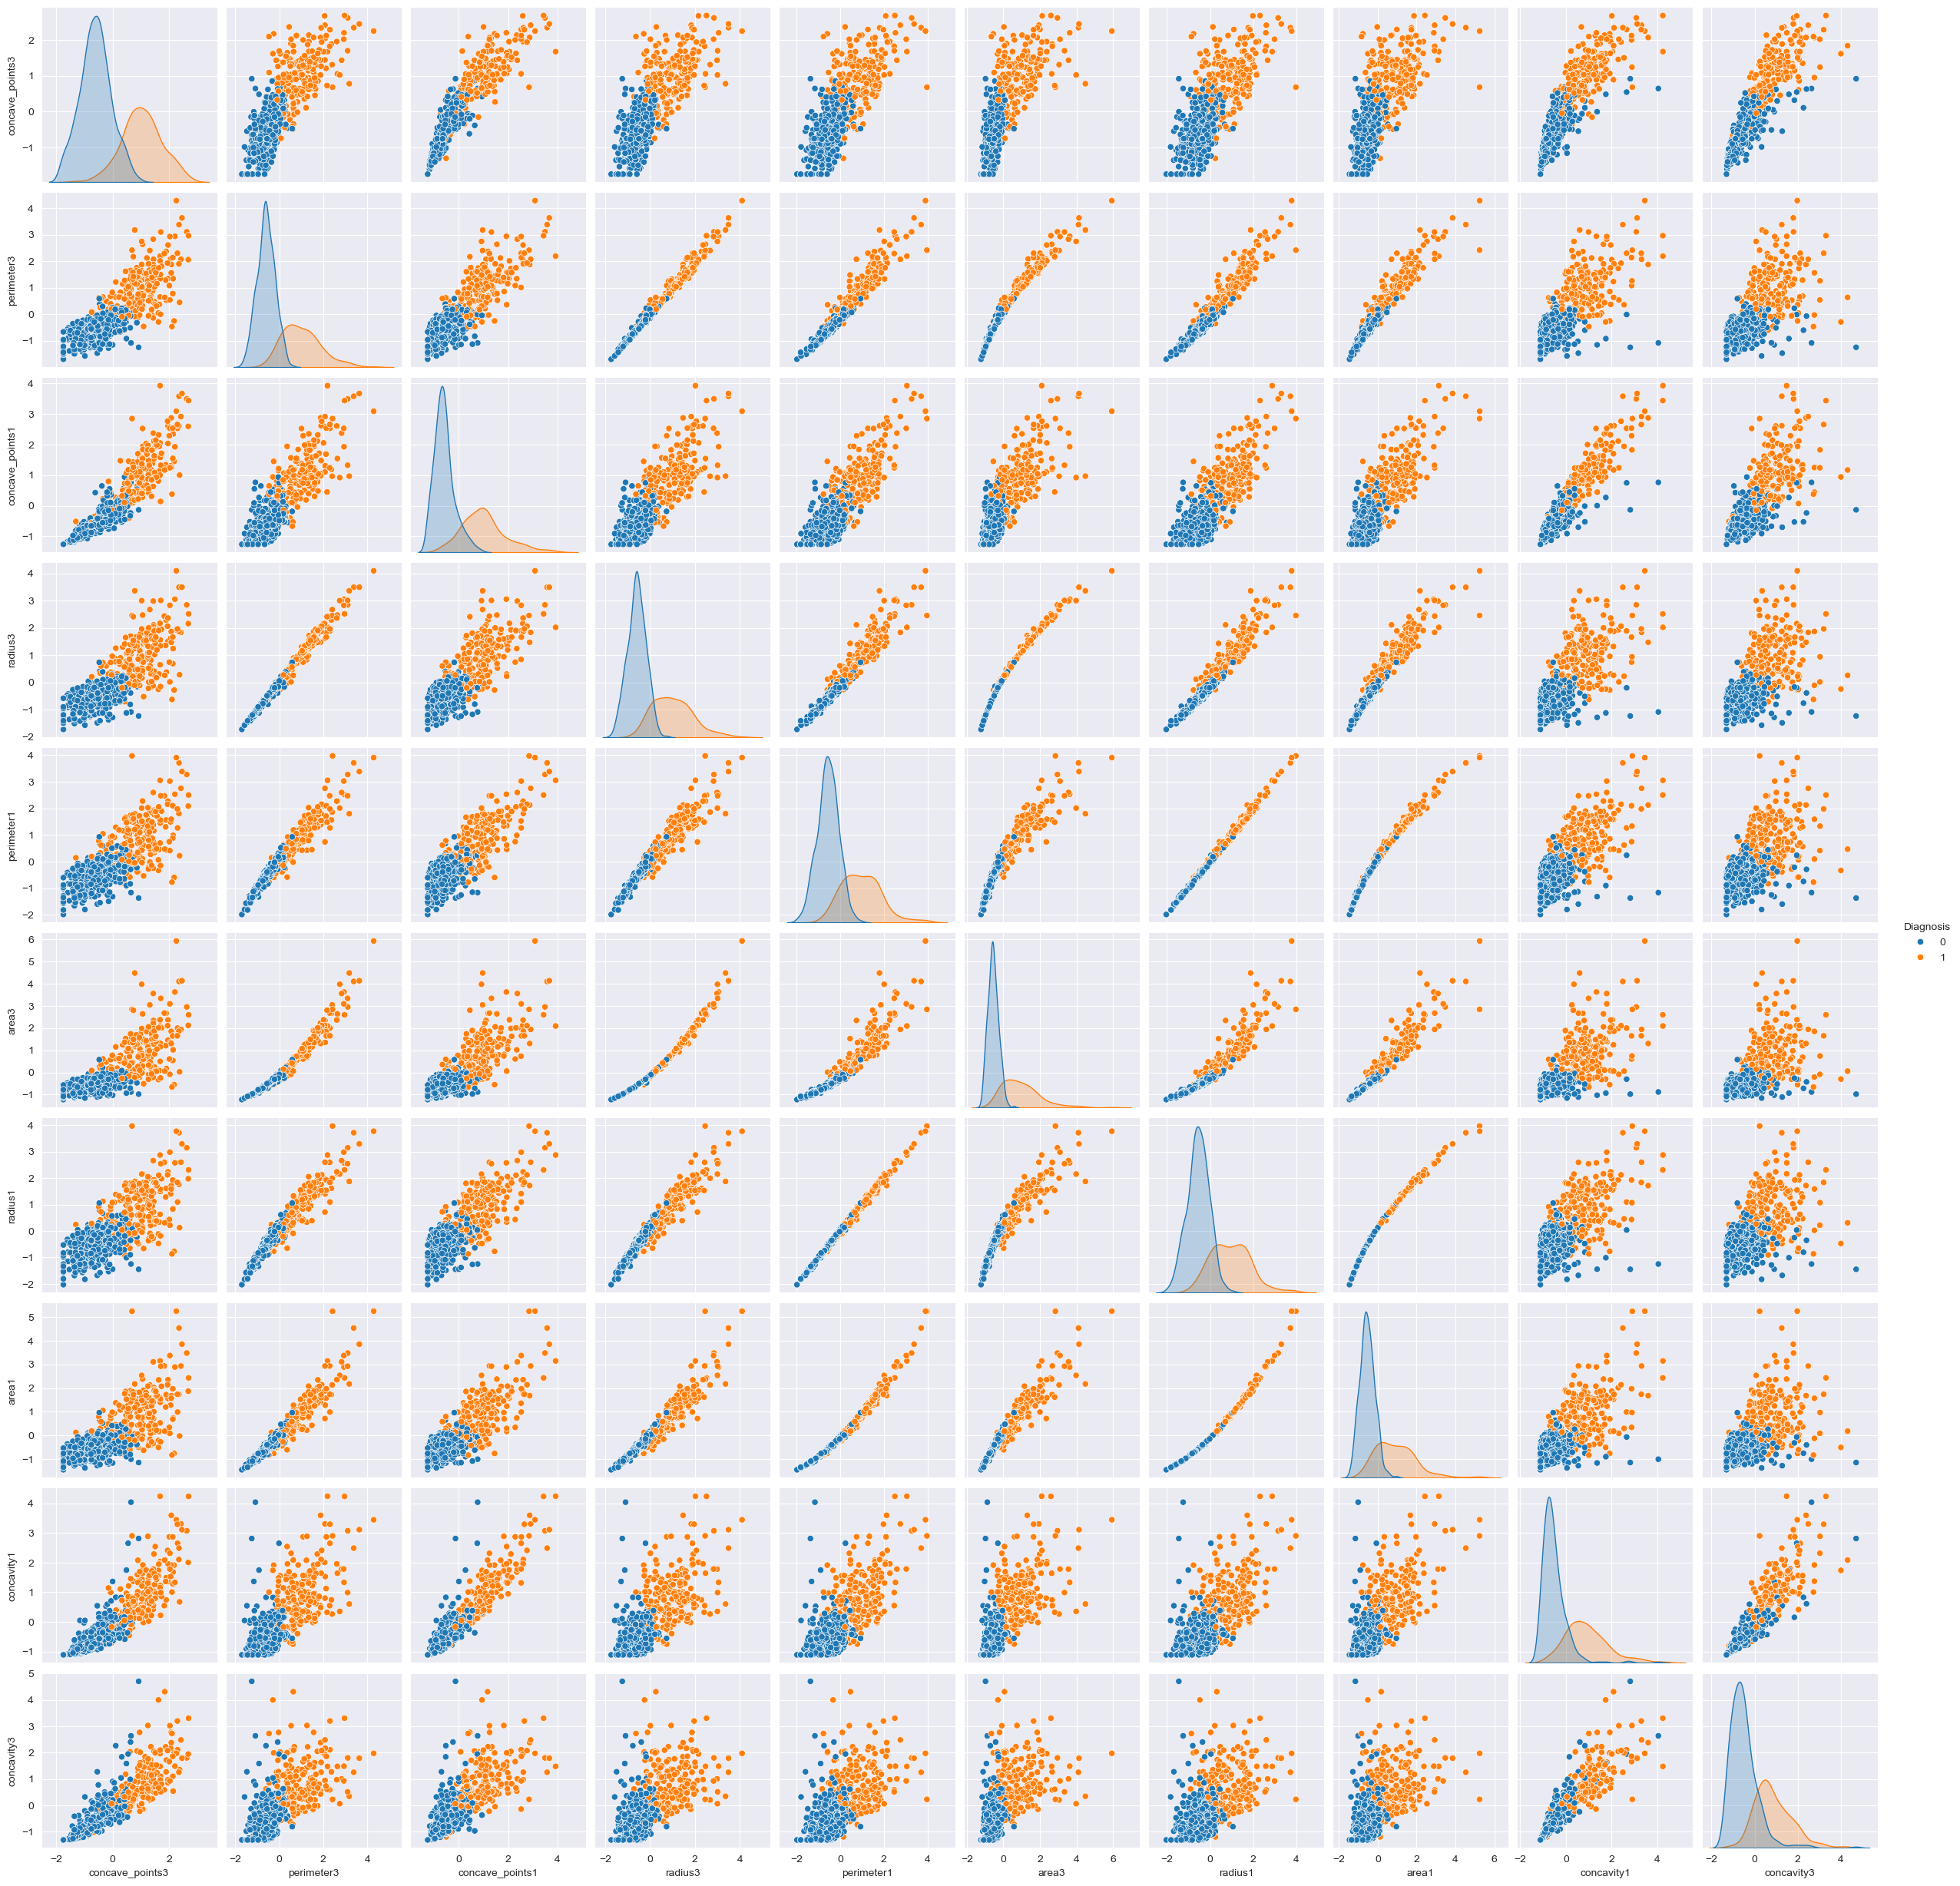

In [12]:
import seaborn as sns

# Select top important features based on regression coefficients
top_features = ["concave_points3", "perimeter3", "concave_points1", "radius3", "perimeter1", "area3", "radius1", "area1", "concavity1", "concavity3"]

df_top = breast_cancer_df[top_features + ["Diagnosis"]]

sns.pairplot(df_top, hue="Diagnosis", diag_kind="kde")
plt.show()

The following top features, `top_features = ["concave_points3", "perimeter3", "concave_points1", "radius3", "perimeter1", "area3", "radius1", "area1", "concavity1", "concavity3"]`, shows clear separation on malignant and benign cases. Also, it shows strong trends. Therefore, we **must include** these features when training.

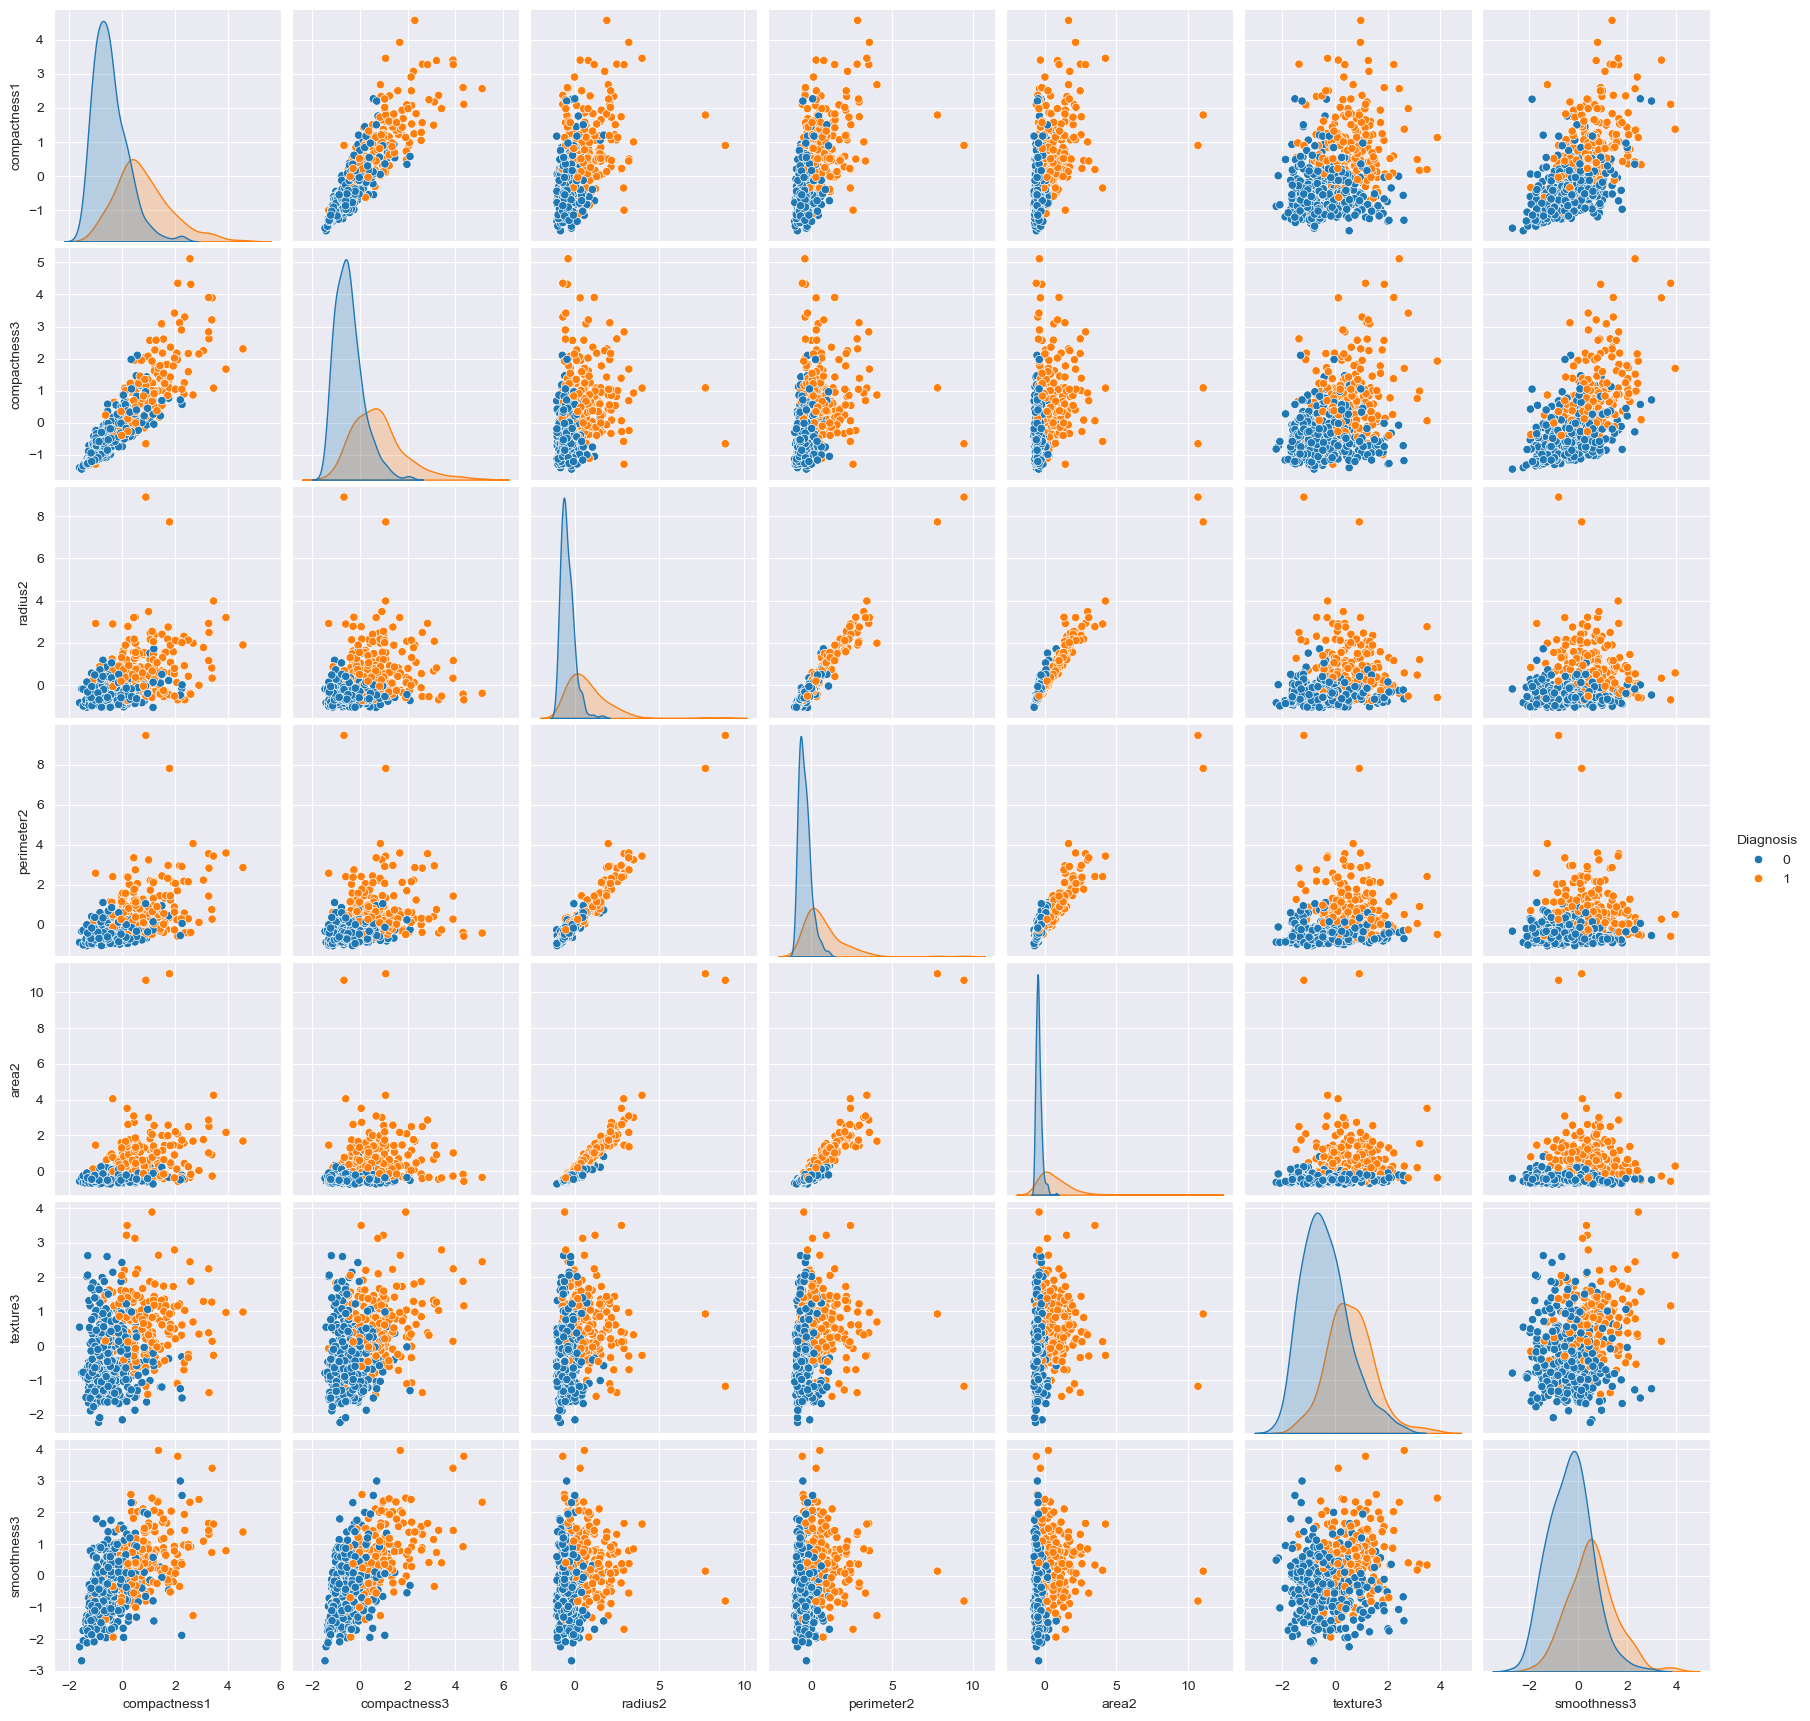

In [13]:
# Select bottom important features based on regression coefficients
sec_top_features = ["compactness1", "compactness3", "radius2", "perimeter2", "area2", "texture3", "smoothness3"]

df_sec_top = breast_cancer_df[sec_top_features + ["Diagnosis"]]

sns.pairplot(df_sec_top, hue="Diagnosis", diag_kind="kde")
plt.show()

The following mid-top features shows intermediate separation and some trends. It is better to explore these data whether to remove or include when training.

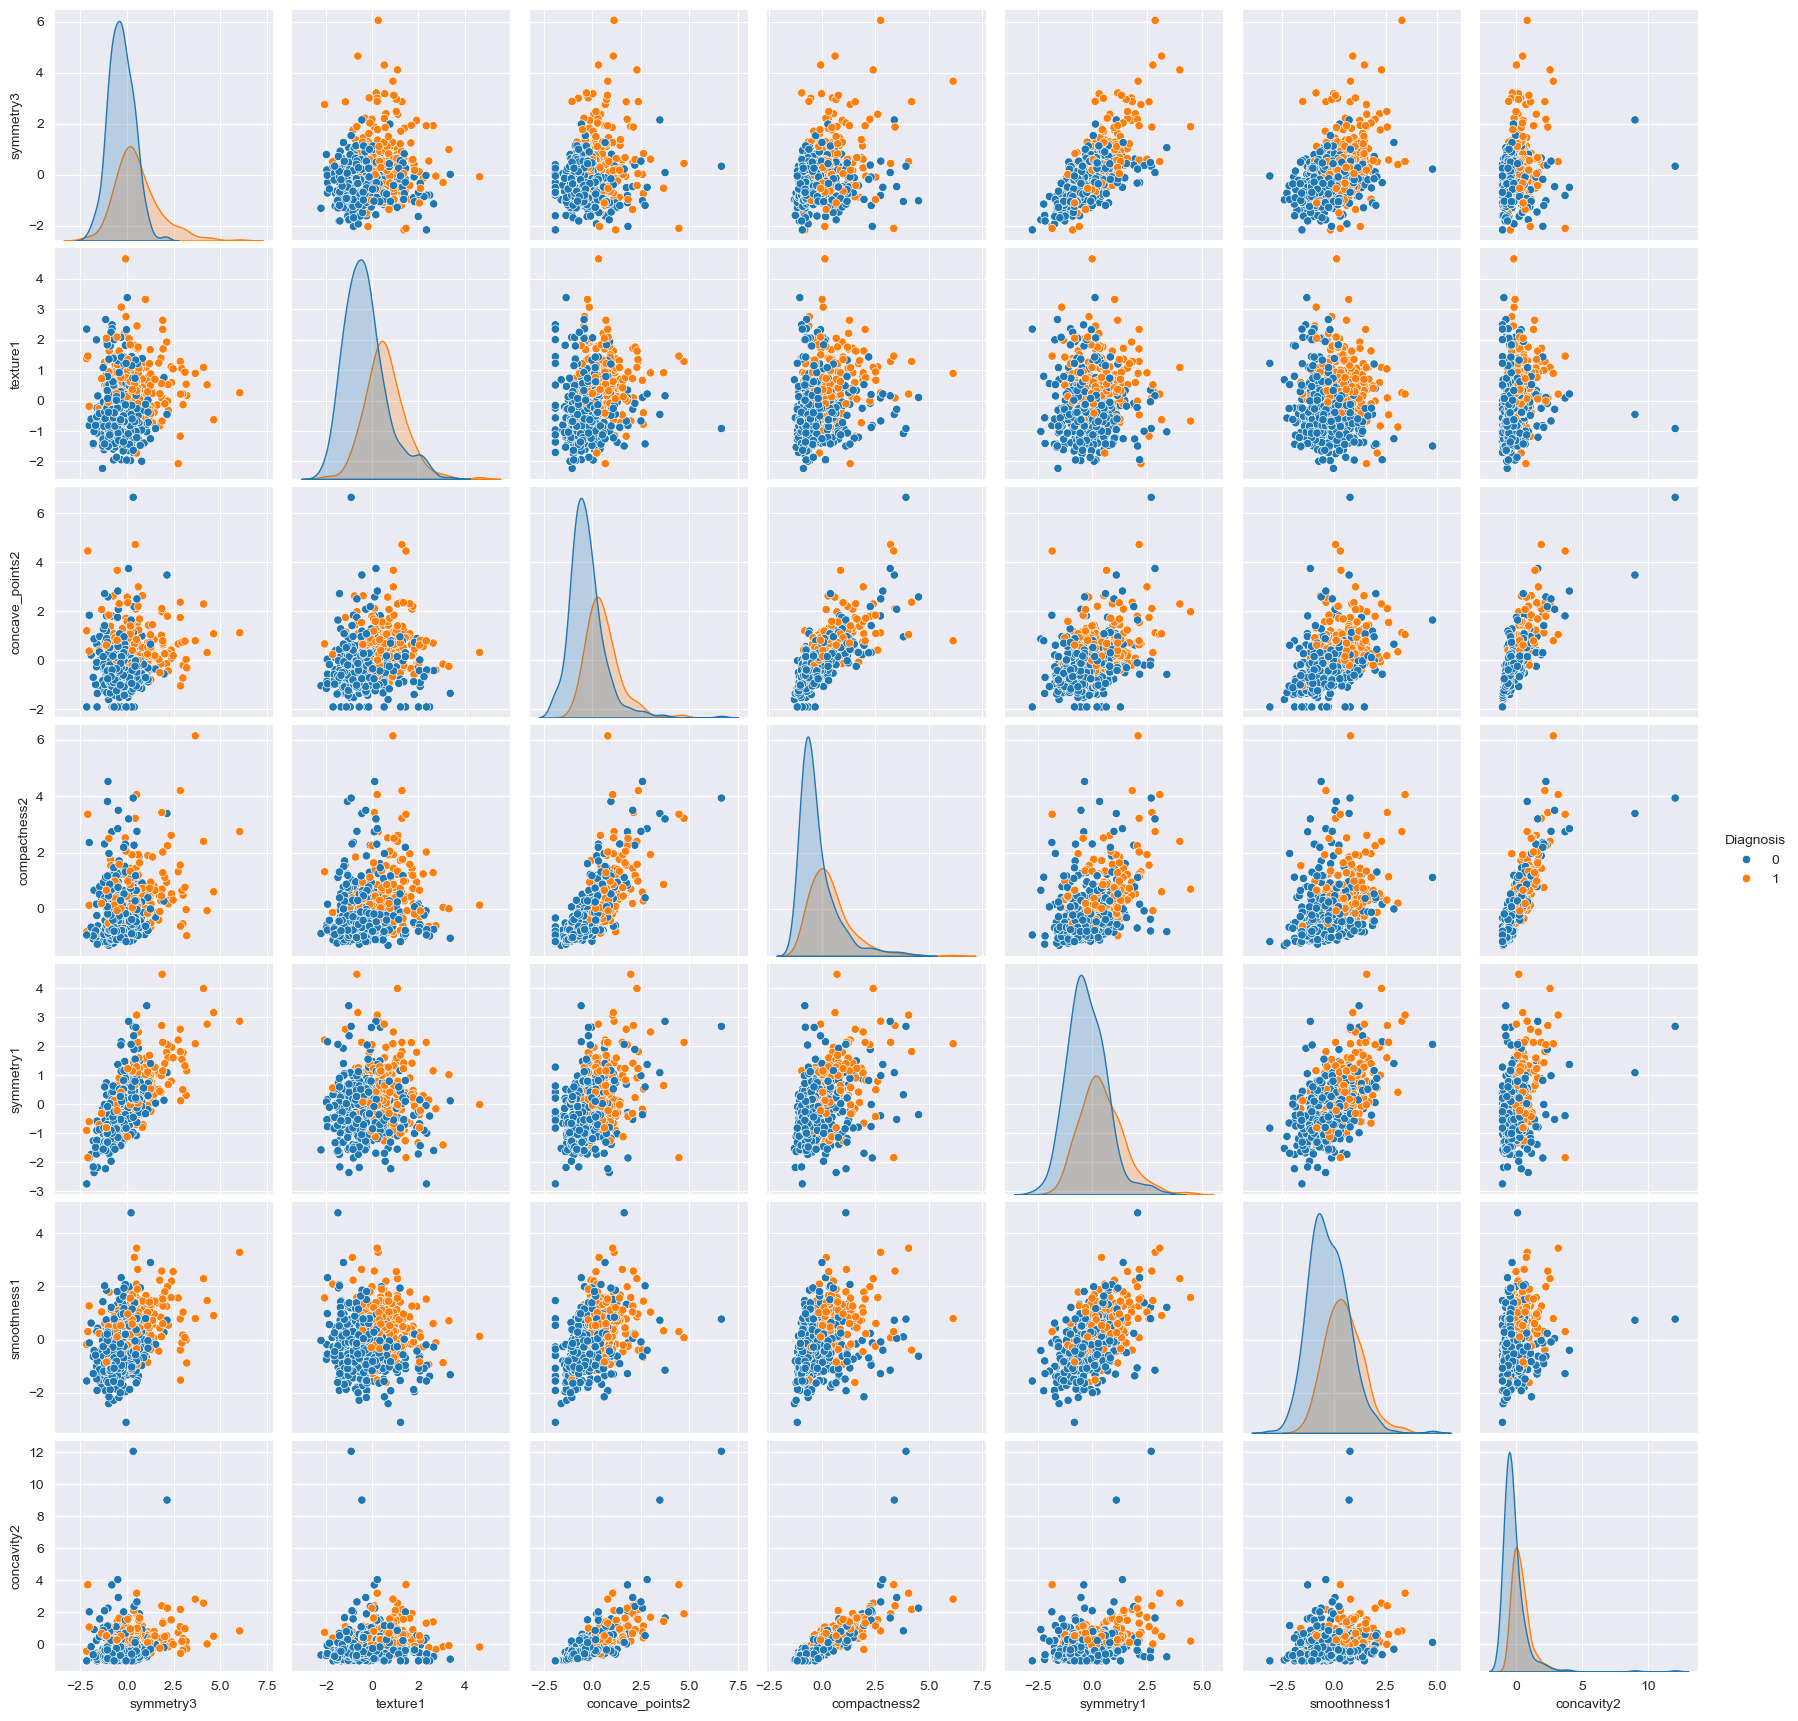

In [14]:
# Select bottom important features based on regression coefficients
sec_bottom_features = ["symmetry3", "texture1", "concave_points2", "compactness2", "symmetry1", "smoothness1", "concavity2"]

df_sec_bottom = breast_cancer_df[sec_bottom_features + ["Diagnosis"]]

sns.pairplot(df_sec_bottom, hue="Diagnosis", diag_kind="kde")
plt.show()

The following mid-top features shows intermediate separation and some trends. It is better to explore these data whether to remove or include when training.

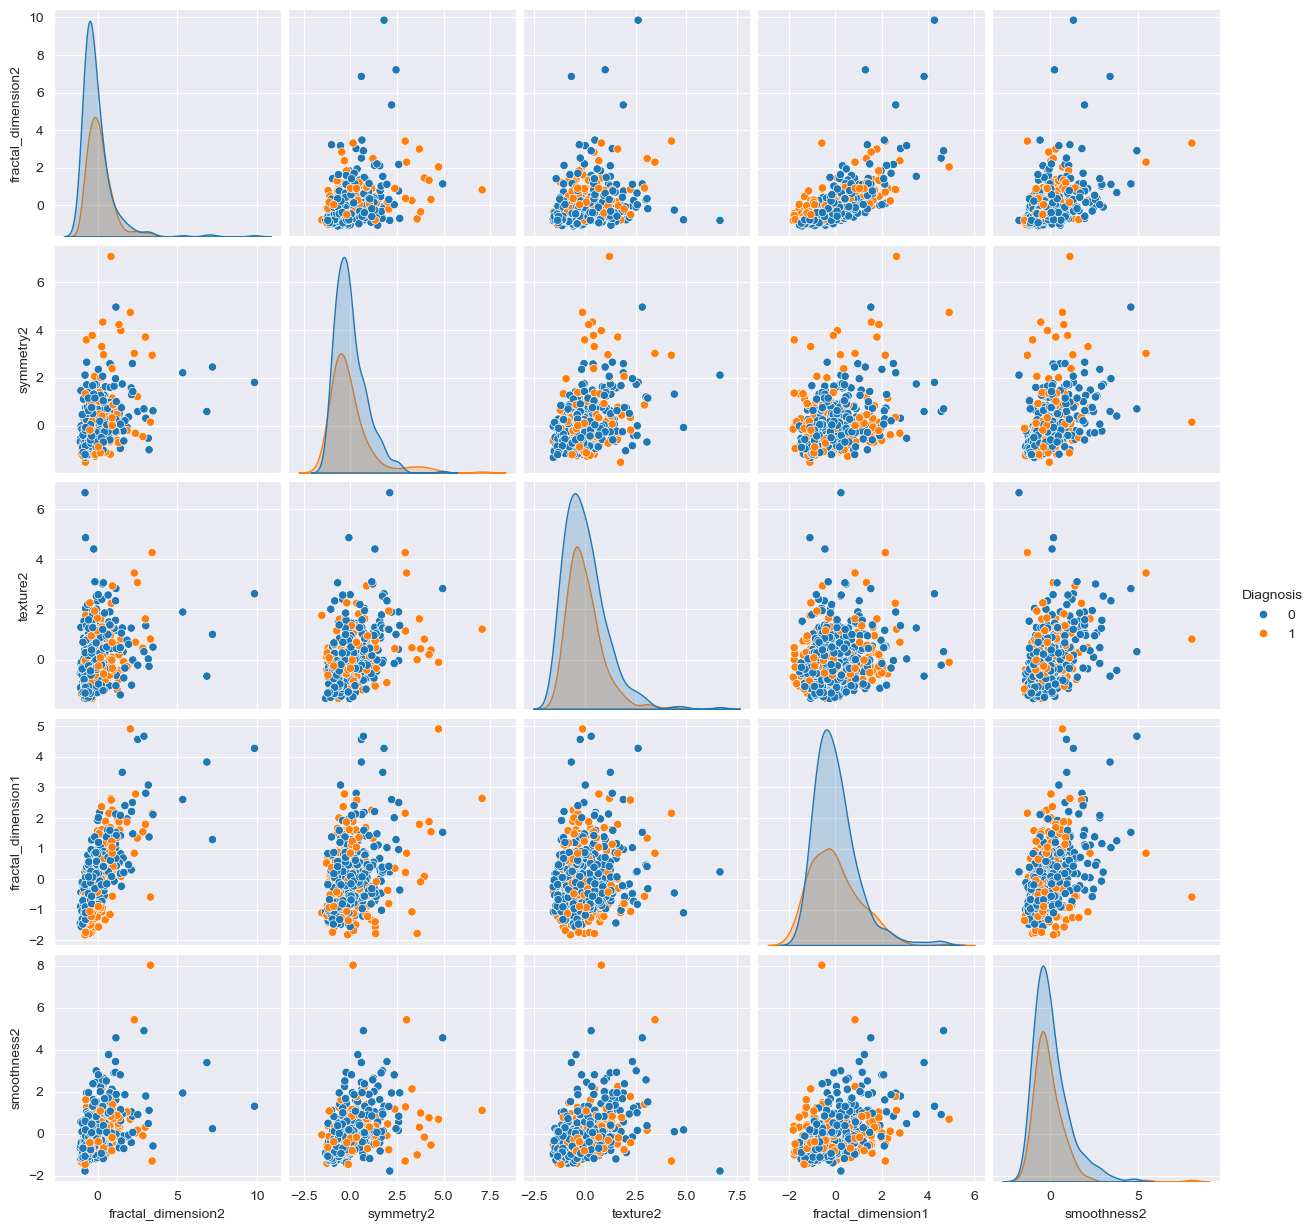

In [15]:
""# Select bottom important features based on regression coefficients
bottom_features = ["fractal_dimension2", "symmetry2", "texture2","fractal_dimension1", "smoothness2"]

df_bottom = breast_cancer_df[bottom_features + ["Diagnosis"]]

sns.pairplot(df_bottom, hue="Diagnosis", diag_kind="kde")
plt.show()

The following bottom features shows no separation and no trends. Therefore, we **remove** these features when training.

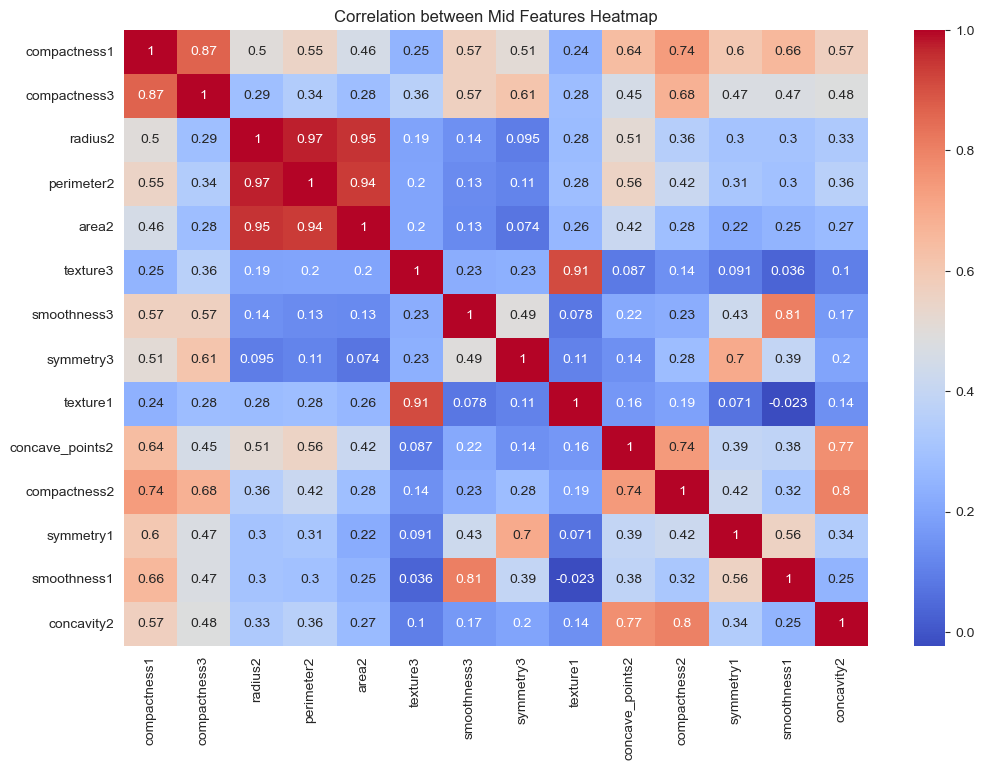

In [16]:
mid_features = ["compactness1", "compactness3", "radius2", "perimeter2", "area2", "texture3", "smoothness3", "symmetry3", "texture1", "concave_points2", "compactness2", "symmetry1", "smoothness1", "concavity2"]

plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled_df[mid_features].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation between Mid Features Heatmap")
plt.show()

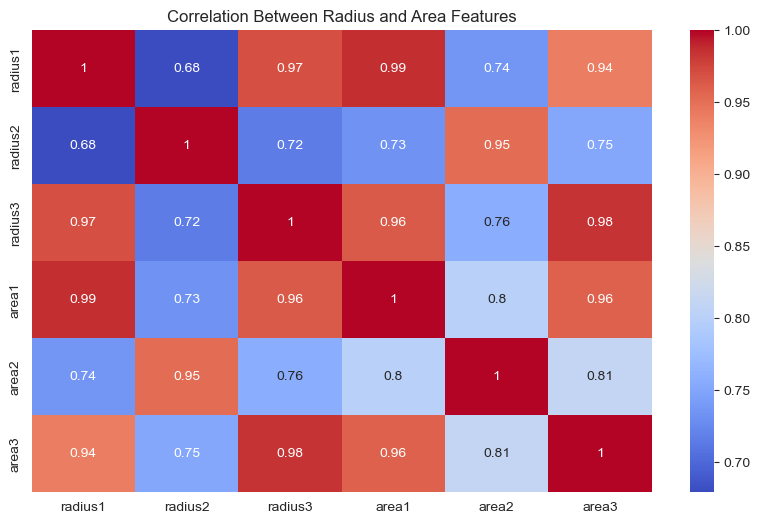

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_scaled_df[["radius1", "radius2", "radius3", "area1", "area2", "area3"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Radius and Area Features")
plt.show()

In [18]:
important_features = ["concave_points3", "perimeter3", "concave_points1", "radius3", "perimeter1", "area3", "radius1", "area1", "concavity1", "concavity3", "compactness1", "compactness3", "radius2", "perimeter2", "area2", "texture3", "smoothness3", "symmetry3", "texture1", "concave_points2", "compactness2", "symmetry1", "smoothness1", "concavity2"]

X = breast_cancer_df[important_features]

In [19]:
from sklearn.model_selection import train_test_split

# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (398, 24)
X_test shape: (171, 24)
y_train shape: (398, 1)
y_test shape: (171, 1)


### Implement Optimization Algorithm to find the minimum cost.

In [43]:
class GradientDescent:
    def __init__(self, learning_rate=0.005, max_iter=1e4, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.epsilon = epsilon

    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_max_iter(self, max_iter):
        self.max_iter = max_iter

    def set_epsilon(self, epsilon):
        self.epsilon = epsilon

    def gradient_descent(self, gradient_fn, loss_fn, X, y, w=None):
        _, n_features = X.shape

        # Initialize weights if not provided
        if w is None:
            w = np.random.randn(n_features, 1) # Random Normal Distribution

        prev_loss = loss_fn(X, y, w)
        loss_history = []

        for i in range(int(self.max_iter)):
            gradient = gradient_fn(X, y, w) # Compute gradient
            w_new = w - self.learning_rate * gradient

            cur_loss = loss_fn(X, y, w_new) # Compute new loss
            loss_history.append(cur_loss)
            # Check for convergence
            if  abs(prev_loss - cur_loss) < self.epsilon:
                break

            prev_loss = cur_loss # Update loss value
            w = w_new   # Update weights

        return w, loss_history

## Helper Functions

In [44]:
from sklearn.model_selection import KFold

# K-Fold Cross-Validation
def cross_validate(model, X_input, y_output):
    X_input = np.asarray(X_input)
    y_output = np.asarray(y_output)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    y = np.array([0.0] * X_input.shape[0])
    yh = np.array([0.0] * X_input.shape[0])

    for train_index, test_index in kf.split(X_input):
        model.fit(X_input[train_index], y_output[train_index])
        y[test_index] = y_output[test_index].flatten()
        predictions = model.predict(X_input[test_index])

        _, num_categories = predictions.shape

        if num_categories > 1: # probabilities
            yh[test_index] = np.argmax(predictions, axis=1)
        else:   # Already class labels
            yh[test_index] = predictions.flatten()

    return y, yh

## Linear Regression

In [45]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias

    def loss_fn_sse(self, X, y, w):
        y_hat = X @ w  # continuous predictions
        return np.sum((y - y_hat) ** 2)

    def gradient_fn_sse(self, X, y, w):
        y_hat = X @ w  # continuous predictions
        return (2 / X.shape[0]) * X.T @ (y_hat - y)

    def fit(self, X, y, gradient_descent=GradientDescent().gradient_descent):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias into X
            X = np.column_stack([np.ones(X.shape[0]), X])

        A = X.T @ X
        y = y.reshape(-1, 1)

        if np.linalg.det(A) < 1e-12:   # Check if matrix A is invertible
            self.w = np.linalg.inv(A) @ X.T @ y
        else: # A is singular, use optimization function to fit.
            self.w, loss_history = gradient_descent(self.gradient_fn_sse, self.loss_fn_sse, X, y)
        return loss_history

    def predict(self, x):
        x = np.asarray(x)

        if self.add_bias: # Add a bias term
            x = np.column_stack([np.ones(x.shape[0]), x])
        y_hat = x @ self.w
        return y_hat

    def accuracy(self, y, y_hat, threshold=0.5):
        y_hat = np.array([1 if val > threshold else 0 for val in y_hat])
        y_hat = np.asarray(y_hat).flatten()
        y = np.asarray(y).flatten()

        if len(y_hat) != len(y):
            print("y_hat and y have different length")
            return

        return np.sum(y_hat == y) / len(y_hat)

In [46]:
linear_regression = LinearRegression()
y_true, y_hat_linear = cross_validate(linear_regression, X_train, y_train)
linear_regression.accuracy(y_true, y_hat_linear)

0.9422110552763819

## Logistic Regression

In [140]:
class LogisticRegression:
    def __init__(self, add_bias=True, is_multi_class=False):
        self.add_bias = add_bias
        self.is_multi_class = is_multi_class

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def loss_fn_bce(self, X, y, w):
        eps = 1e-20
        y_hat = self.sigmoid(X @ w)

        loss = -y * np.log(y_hat + eps) - (1 - y) * np.log(1 - y_hat + eps)
        return np.mean(loss)

    def gradient_fn_bce(self, X, y, w):
        y_hat = self.sigmoid(X @ w)
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        return (1 / X.shape[0]) * X.T @ (y_hat - y)

    def fit(self, X, y, gradient_descent=GradientDescent().gradient_descent):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias into X
            X = np.column_stack([np.ones(X.shape[0]), X])

        self.w, loss_history = gradient_descent(self.gradient_fn_bce, self.loss_fn_bce, X, y)
        return loss_history

    def predict(self, x):
        x = np.asarray(x)

        if self.add_bias: # Add a bias term
            x = np.column_stack([np.ones(x.shape[0]), x])

        y_hat = self.sigmoid(x @ self.w)
        return y_hat

    def accuracy(self, y, y_hat, threshold=0.5):
        y_hat = np.array([1 if val > threshold else 0 for val in y_hat])
        y_hat = np.asarray(y_hat).flatten()
        y = np.asarray(y).flatten()

        if len(y_hat) != len(y):
            print("y_hat and y have different length")
            return

        return np.mean(y_hat == y)

    def check_grad(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        if self.add_bias:   # Add bias to X
            X_bias = np.column_stack([np.ones(X.shape[0]), X])
        else:
            X_bias = X

        W = self.w.copy()
        diff = np.zeros_like(W)
        epsilon_val = 1e-4

        D, C = W.shape

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros_like(W)
                epsilon[i, j] = epsilon_val

                W_plus = W + epsilon
                W_minus = W - epsilon
                J1 = self.loss_fn_bce(X_bias, y, W_plus)
                J2 = self.loss_fn_bce(X_bias, y, W_minus)

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.gradient_fn_bce(X_bias, y, W)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / np.square(derived_grad + numeric_grad).sum()

        return diff.sum()

In [138]:
logistic_regression = LogisticRegression()
y_true, y_hat_logistic = cross_validate(logistic_regression, X_train, y_train)
logistic_regression.accuracy(y_true, y_hat_logistic)

0.9723618090452262

In [139]:
logistic_regression.check_grad(X_train, y_train)

1.4934255090670562e-16

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score


def auroc(y_true, y_pred, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    plt.clf()
    plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.3f"%auc)
    plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")
    plt.show()

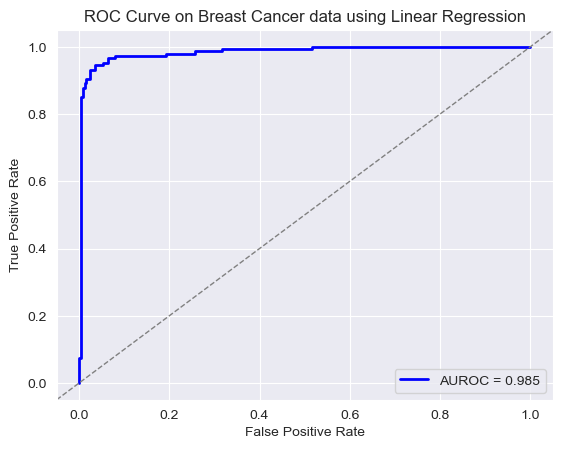

In [50]:
auroc(y_true, y_hat_linear, "ROC Curve on Breast Cancer data using Linear Regression")

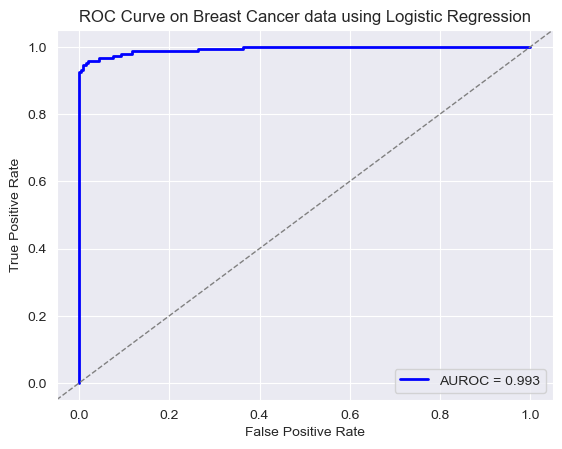

In [51]:
auroc(y_true, y_hat_logistic, "ROC Curve on Breast Cancer data using Logistic Regression")

## Gradient Decent

In [52]:
logistic_regression = LogisticRegression()
ce_loss_history = logistic_regression.fit(X_train, y_train)

In [59]:
def plot_gradient_loss(loss_history):
    plt.figure(figsize=(16, 8))
    plt.plot(loss_history, label="loss", color="blue")
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Convergence Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

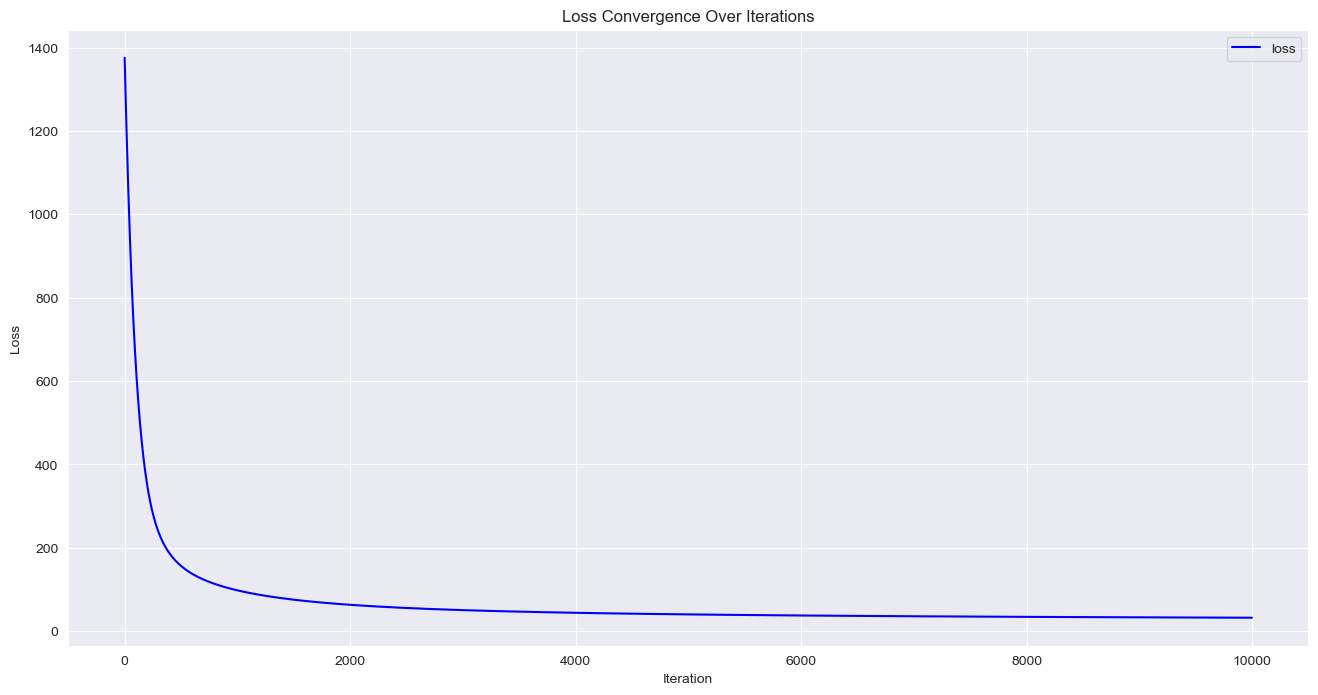

In [60]:
plot_gradient_loss(ce_loss_history)